In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Standard python version using two loops

In [23]:
def CalculateFeigenTree(N=1000, K=1000):
    xp, kp = [], []
    
    for k in np.linspace(0, 4, K):
        x = 0.5
        for n in range(N):
            if n>100:
                xp.append(x)
                kp.append(k)
            x = k*x*(1-x)

    return xp, kp


In [24]:
xp, kp = CalculateFeigenTree()

Text(0.5, 1.0, 'Bifurcation diagram')

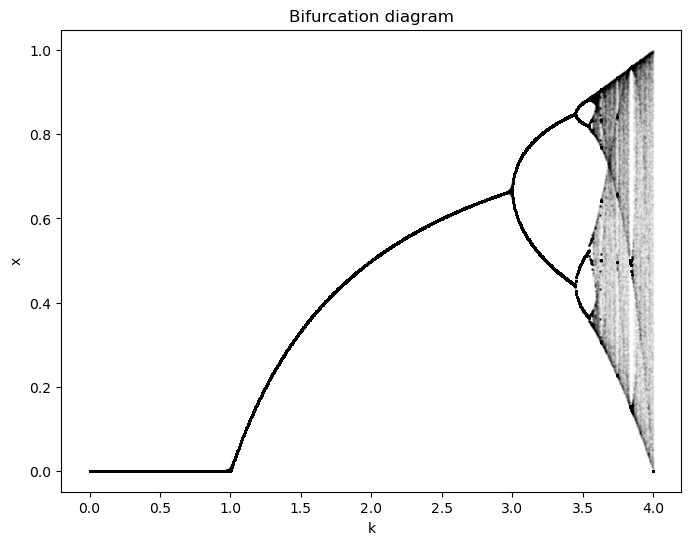

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(kp, xp, marker='.', s=2, color='k', alpha=0.01)  # marker='o' draws small circle points instead of pixel dots
plt.xlabel('k')
plt.ylabel('x')
plt.title('Bifurcation diagram')

In [ ]:
%time xp, kp = CalculateFeigenTree(K=100_000)

CPU times: user 12.8 s, sys: 896 ms, total: 13.7 s
Wall time: 13.7 s


### Vectorized version using a single loop

In [ ]:
def CalculateFeigenTreeNumpy(N=1000, K=1000):
    xp_list, kp_list = [], []
    k = np.linspace(0, 4, K)
    x = np.full(K, 0.5)  # wektor wartości x dla wszystkich k naraz

    for n in range(N):
        x = k * x * (1 - x)
        if n > 100:
            xp_list.append(x.copy())
            kp_list.append(k.copy())

    if xp_list:
        xp = np.concatenate(xp_list)
        kp = np.concatenate(kp_list)
    else:
        xp = np.array([], dtype=float)
        kp = np.array([], dtype=float)

    return xp, kp

In [39]:
xp, kp = CalculateFeigenTreeNumpy(K=1000)

Text(0.5, 1.0, 'Bifurcation diagram')

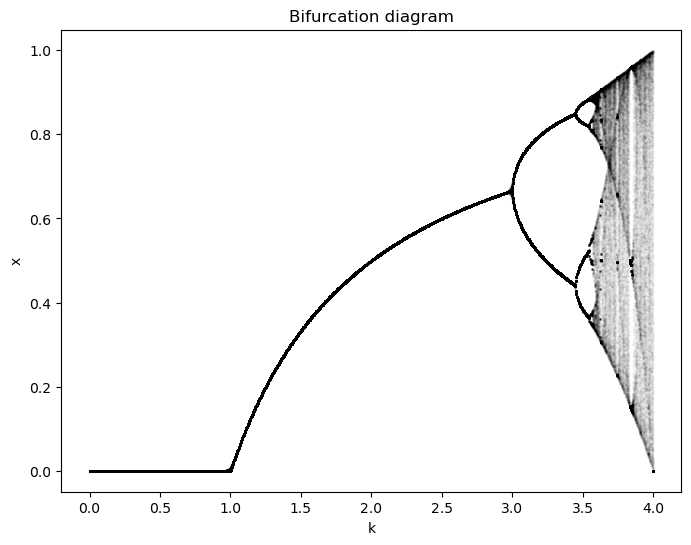

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(kp, xp, marker='.', s=2, color='k', alpha=0.01)  # marker='o' draws small circle points instead of pixel dots
plt.xlabel('k')
plt.ylabel('x')
plt.title('Bifurcation diagram')

In [41]:
%time xp, kp = CalculateFeigenTreeNumpy(K=100_000)

CPU times: user 339 ms, sys: 270 ms, total: 609 ms
Wall time: 609 ms


### Conclusion: vectorized version works 12.8/0.339=38 times faster

In [ ]:
def CalculateFeigenTreeNumpy_prealloc(N=1000, K=1000):
    """
    Wersja z pełną prealokacją (bez list), zwraca xp, kp takie jak poprzednio.
    """
    k = np.linspace(0, 4, K)
    x = np.full(K, 0.5)

    iterations = max(0, N - 101)  
    if iterations == 0:
        return np.array([], dtype=float), np.array([], dtype=float)

    total = K * iterations
    xp = np.empty(total, dtype=float)
    kp = np.empty(total, dtype=float)

    offset = 0
    for n in range(N):
        x = k * x * (1 - x)
        if n > 100:
            xp[offset:offset + K] = x
            kp[offset:offset + K] = k
            offset += K

    return xp, kp

In [47]:
%time xp, kp = CalculateFeigenTreeNumpy_prealloc(K=100_000)

CPU times: user 187 ms, sys: 101 ms, total: 288 ms
Wall time: 288 ms


### Conclusion2: vectorized version works 13.7/0.339=73 times faster